In [12]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems")
using GenLinAlgProblems, LinearAlgebra, Printf, Latexify, Plots #, Interact

using PyCall
itikz = pyimport("itikz")
nM    = pyimport("itikz.nicematrix")

Base.show(io::IO, f::Float64) = @printf(io, "% 12.5f", f)

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


In [13]:
# Implement the scheme x_{n+1} = Ã x_n + b̃, starting at x₁ = x, total number of steps N
#    error             e_{n+1} = A^n e_1
function run( Ã, b̃, x, N; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, N)
    for i = 1:N
        x_old    = x
        x        = Ã*x_old + b̃
        error[i] = norm(x - x_old)
        if show; print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    println()
    x,error
end

function run_sor( Ã, b̃, x, N, α; show=true)
    if show
        evals = eigen(Ã).values
        spectral_radius = maximum( abs.(evals) )
        println("\n****** Spectral Radius: $spectral_radius \n")
    end

    error = Array{Float64,1}(undef, N)
    for i = 1:N
        x_old    = x
        x_star   = Ã*x_old + b̃
        x        = x_old + α * (x_star - x_old )
        error[i] = norm(x - x_old)

        if show;  print( round.(x,digits=5) ); println( "   $(error[i])"); end
    end
    if show; println(); end
    x,error
end;

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">Iterative Methods</strong></div>


# 1. Jacobi Method

Let $A = S - T, $ where $S$ in chosen to be invertible

Then $A x = b \Leftrightarrow S x = T x + b \Leftrightarrow x = S^{-1} T x + S^{-1} b$

The Jacobi method chooses $S = Diagonal(A)$.

In [14]:
A = [ 6 2 -3; -1 3 1; 1 2 4]; b = [1;1;1]
println( "Solve A x = b,  where [A, b] =")
latexify([A', b']' )

Solve A x = b,  where [A, b] =


L"\begin{equation}
\left[
\begin{array}{cc}
\left[
\begin{array}{ccc}
6 & 2 & -3 \\
-1 & 3 & 1 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{c}
1 \\
1 \\
1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [4]:
S = diagm(diag((A)))
T = S - A
println("A,S,T")
display(latexify([A', S',T']'))
#Base.print_matrix(stdout, Sinv); println()

Sinv = inv(Rational.(S))
Ã    = Sinv*T; b̃ = Sinv *b

d,intÃ=factor_out_denominator(Ã)
println( "\nIterative Scheme Fixed Point: x = Ã x + b̃.\n\nÃ, b̃ =" )
latexify([1//d, intÃ', 1//d, d*b̃']')

A,S,T


L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{ccc}
6 & 2 & -3 \\
-1 & 3 & 1 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
6 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
0 & -2 & 3 \\
1 & 0 & -1 \\
-1 & -2 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"


Iterative Scheme Fixed Point: x = Ã x + b̃.

Ã, b̃ =


L"\begin{equation}
\left[
\begin{array}{cccc}
\frac{1}{12} & \left[
\begin{array}{ccc}
0 & -4 & 6 \\
4 & 0 & -4 \\
-3 & -6 & 0 \\
\end{array}
\right] & \frac{1}{12} & \left[
\begin{array}{c}
2 \\
4 \\
3 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

In [15]:
x = [0;0;0]
N = 20

xN, J_error = run( Ã, b̃, x, N)

println("\n***** final step:   || A xₙ - b || = $(norm(A*xN - b))\n" ) 
plot(J_error, label="J Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )


****** Spectral Radius:      0.16667 

[     0.16667,      0.38889,      0.01389]        0.42333
[     0.04398,      0.34336,      0.06732]        0.14135
[     0.08587,      0.33952,      0.05877]        0.04293
[     0.08288,      0.34137,      0.05860]        0.00352
[     0.08217,      0.34119,      0.05886]        0.00077
[     0.08237,      0.34117,      0.05882]        0.00020
[     0.08236,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


LoadError: OverflowError: 36 * 935976560656121856 overflowed for type Int64

-----
System Need not converge!


****** Spectral Radius:      5.44949 

[     3.00000,      1.00000]        3.16228
[     8.00000,      9.00000]        9.43398
[    29.00000,     54.00000]       49.65884
[   140.00000,    300.00000]      269.88331
[   743.00000,   1641.00000]     1470.33670
[  4028.00000,   8949.00000]     8012.37100
[ 21929.00000,  48774.00000]    43663.21594
[ 119480.00000,  265800.00000]    237942.18263
[ 651083.00000,  1448481.00000]    1296663.44800
[ 3548048.00000,  7893489.00000]    7066154.14007



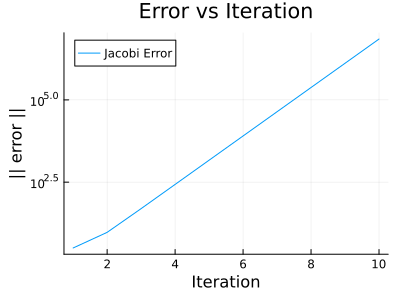

In [6]:
x,e = run([1 2; 1 5], [3;1], [0;0], 10)
plot(e, label="Jacobi Error" )
plot!(legend=:topleft, yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 2. Gauss Seidel

**Idea:** Improve on Jacobi by substituting each entry in the vector as soon as it is computed.

$\qquad$ The net effect is to set $S$ to the lower triangular part of $A$.

In [7]:
S = LowerTriangular(A)

T    = S - A

Sinv = inv(Rational.(S))
Ã    = Sinv*T; b̃ = Sinv *b

println("A,S,T")
display(latexify([A', S',T']'))

d,intÃ=factor_out_denominator(Ã)
println( "\nIterative Scheme Fixed Point: x = Ã x + b̃.\n\nÃ, b̃ =" )
latexify([1//d, intÃ', 1//d, d*b̃']')

A,S,T


L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{ccc}
6 & 2 & -3 \\
-1 & 3 & 1 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
6 & 0 & 0 \\
-1 & 3 & 0 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
0 & -2 & 3 \\
0 & 0 & -1 \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"


Iterative Scheme Fixed Point: x = Ã x + b̃.

Ã, b̃ =


L"\begin{equation}
\left[
\begin{array}{cccc}
\frac{1}{72} & \left[
\begin{array}{ccc}
0 & -24 & 36 \\
0 & -8 & -12 \\
0 & 10 & -3 \\
\end{array}
\right] & \frac{1}{72} & \left[
\begin{array}{c}
12 \\
28 \\
1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"


****** Spectral Radius:      0.16667 

[     0.16667,      0.38889,      0.01389]        0.42333
[     0.04398,      0.34336,      0.06732]        0.14135
[     0.08587,      0.33952,      0.05877]        0.04293
[     0.08288,      0.34137,      0.05860]        0.00352
[     0.08217,      0.34119,      0.05886]        0.00077
[     0.08237,      0.34117,      0.05882]        0.00020
[     0.08236,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xₙ - b || =      0.00000



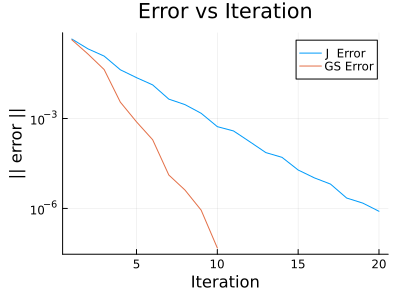

In [8]:
x = [0;0;0]
N = 10

xN,GS_error = run( Ã, b̃, x, N)

println("\n*****   || A xₙ - b || = $(norm(A*xN - b))\n" )

plot( J_error, label="J  Error")
plot!(GS_error, label="GS Error" )
plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

# 3. Successive Overrelaxation (SOR)

**Idea** improve on Gauss Seidel by changing the step: instead of using the Gauss Seidel solution $x_n$ obtained from $x_{n-1}$
<br>$\qquad$ move to $\tilde{x}_n = x_{n-1} + \alpha \left( x_n - x_{n-1} \right)$ with some step size $\alpha \ne 1$.

In [9]:
S = LowerTriangular(A)
T    = S - A

Sinv = inv(Rational.(S))
Ã    = Sinv*T; b̃ = Sinv *b

println("A,S,T")
display(latexify([A', S',T']'))

d,intÃ=factor_out_denominator(Ã)
println( "\nIterative Scheme Fixed Point: x = Ã x + b̃.\n\nÃ, b̃ =" )
latexify([1//d, intÃ', 1//d, d*b̃']')

A,S,T


L"\begin{equation}
\left[
\begin{array}{ccc}
\left[
\begin{array}{ccc}
6 & 2 & -3 \\
-1 & 3 & 1 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
6 & 0 & 0 \\
-1 & 3 & 0 \\
1 & 2 & 4 \\
\end{array}
\right] & \left[
\begin{array}{ccc}
0 & -2 & 3 \\
0 & 0 & -1 \\
0 & 0 & 0 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"


Iterative Scheme Fixed Point: x = Ã x + b̃.

Ã, b̃ =


L"\begin{equation}
\left[
\begin{array}{cccc}
\frac{1}{72} & \left[
\begin{array}{ccc}
0 & -24 & 36 \\
0 & -8 & -12 \\
0 & 10 & -3 \\
\end{array}
\right] & \frac{1}{72} & \left[
\begin{array}{c}
12 \\
28 \\
1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"


****** Spectral Radius:      0.16667 

[     0.15000,      0.35000,      0.01250]        0.38099
[     0.06562,      0.34812,      0.05703]        0.09542
[     0.07779,      0.34145,      0.05958]        0.01411
[     0.08216,      0.34106,      0.05890]        0.00444
[     0.08240,      0.34116,      0.05881]        0.00028
[     0.08236,      0.34118,      0.05882]        0.00005
[     0.08235,      0.34118,      0.05882]        0.00001
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000
[     0.08235,      0.34118,      0.05882]        0.00000


*****   || A xₙ - b || =      0.00000



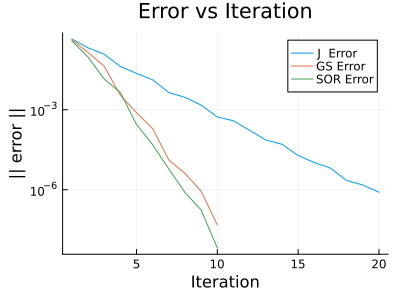

In [10]:
x = [0;0;0]
N = 10

xN,SOR_error = run_sor( Ã, b̃, x, N, 0.9)

println("\n*****   || A xₙ - b || = $(norm(A*xN - b))\n" ) 

plot( J_error,   label="J  Error")
plot!(GS_error,  label="GS Error" )
plot!(SOR_error, label="SOR Error" )

plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )

In [11]:
using Interact
@manipulate for α in range(0.01, stop=2, length = 21)
    xN,SOR_error = run_sor( Ã, b̃, x, N, α; show=false)
    plot( J_error,   label="J  Error")
    plot!(GS_error,  label="GS Error" )
    plot!(SOR_error, label="SOR Error" )

    plot!(yscale=:log10, title="Error vs Iteration", xlabel="Iteration", ylabel = "|| error ||", size=(400,300) )
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["α"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(11), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\jeff\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\jeff\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\jeff\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\jeff\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\jeff\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001737604fa30, Task (runnable) @0x000001737604fa30), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 1593479858960, 1593479859616)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"     0.01000\",\"     0.10950\",\"     0.20900\",\"     0.30850\",\"     0.40800\",\

# 4. Power Itertion

In [ ]:
function power_iteration( A, x, Nmax=50, tol=1e-5)
    new_x        = A * x

    normalized_x = new_x / norm(new_x)
    diff         = normalized_x - x
    if diff < tol
        return nom
end